# 编程实现对率回归，并给出西瓜数据集3.0 α上的结果.
>数据集：

| 密度   | 含糖率 | 好瓜 |
|--------|--------|------|
| 0.697  | 0.460  | 1    |
| 0.774  | 0.376  | 1    |
| 0.634  | 0.264  | 1    |
| 0.608  | 0.318  | 1    |
| 0.556  | 0.215  | 1    |
| 0.403  | 0.237  | 1    |
| 0.481  | 0.149  | 1    |
| 0.437  | 0.211  | 1    |
| 0.666  | 0.091  | 0    |
| 0.243  | 0.267  | 0    |
| 0.245  | 0.057  | 0    |
| 0.343  | 0.099  | 0    |
| 0.639  | 0.161  | 0    |
| 0.657  | 0.198  | 0    |
| 0.360  | 0.370  | 0    |
| 0.593  | 0.042  | 0    |
| 0.719  | 0.103  | 0    |

In [40]:
import numpy as np
import matplotlib.pyplot as plt

## 数据集准备

In [41]:
def getDataSet():
    """
    get watermelon data set 3.0 alpha.
    :return:(feature array, label array)
    """
    dataSet = np.array([
        [0.697, 0.460, 1],
        [0.774, 0.376, 1],
        [0.634, 0.264, 1],
        [0.608, 0.318, 1],
        [0.556, 0.215, 1],
        [0.403, 0.237, 1],
        [0.481, 0.149, 1],
        [0.437, 0.211, 1],
        [0.666, 0.091, 0],
        [0.243, 0.267, 0],
        [0.245, 0.057, 0],
        [0.343, 0.099, 0],
        [0.639, 0.161, 0],
        [0.657, 0.198, 0],
        [0.360, 0.370, 0],
        [0.593, 0.042, 0],
        [0.719, 0.103, 0]
    ])

    # insert number 1 before colummn 0.
    # e.g: dataSet[0]=[1,0.697,0.460,1]
    dataSet = np.insert(dataSet,0,
                        np.ones(dataSet.shape[0]),
                        axis=1)
    dataArr = dataSet[:,:-1]
    labelArr = dataSet[:,-1]
    return dataArr, labelArr

## 实现Newton法

In [42]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def newton(dataArr, labelArr):
    """
    calculate logistic parameters by newton method.

    :param dataArr: input data set with shape(m,n)
    :param labelArr: the label of data set with shape(m,1)
    :return: return the parameters obtained by newton method.
    """
    m,n = dataArr.shape
    labelArr = labelArr.reshape(-1,1)
    beta = np.ones((n,1))
    errList=[] #save error history

    z=np.dot(dataArr,beta)
    oldLbeta=0
    # shape(m,1)
    newLBetaMat=-labelArr*np.log(sigmoid(z))-(1-labelArr)*np.log(1-sigmoid(z)) # likehood && loss
    newLBeta = np.sum(newLBetaMat)
    it=0
    while abs(oldLbeta-newLBeta)>1e-9:
        it+=1
        # py0=p(y=0|x) with shape (m,1)
        py1=sigmoid(np.dot(dataArr,beta))
        py0=1-py1
        # 'reshape(n)' get shape (n,);'np.diag' get diagonal matrix with shape (m,m)
        p=np.diag((py0*py1).reshape(m))

        # shape (m,n)
        dBetaMat=-dataArr*(labelArr-py1)
        # first derivative with shape (1,n)
        dBeta=np.sum(dBetaMat,axis=0,keepdims=True)
        # second derivative with shape (n,n)
        dBeta2=dataArr.T.dot(p).dot(dataArr)
        dBeta2Inv=np.linalg.inv(dBeta2)
        #(n,1) (n,1)         (n,n)     (n,1)
        beta = beta - np.dot(dBeta2Inv,dBeta.T)

        z=np.dot(dataArr,beta)
        oldLbeta=newLBeta
        newLBetaMat=-labelArr*np.log(sigmoid(z))-(1-labelArr)*np.log(1-sigmoid(z))
        newLBeta=np.sum(newLBetaMat)

        pre=predict(beta,dataArr)
        errorRate = cntErrRate(pre,labelArr)
        errList.append(errorRate)

    print("newton iteration is",it)
    return beta,errList

## 实现梯度下降

In [43]:
def gradDescent(dataArr, labelArr,alpha,T):
    """
    calculate logistic parameters by gradient descent method.
    :param dataArr: input data set with shape(m,n)
    :param labelArr: the label of data set with shape(m,1)
    :param alpha: step length (learning rate)
    :param T: iteration
    :return: parameters of gradient descent method.
    """
    m,n = dataArr.shape
    labelArr = labelArr.reshape(-1,1)
    errList=[]

    beta=np.ones((n,1))
    for t in range(T):
        py1=sigmoid(np.dot(dataArr,beta))
        dBetaMat=-dataArr*(labelArr-py1)
        # shape (1,n)
        dBeta=np.sum(dBetaMat,axis=0,keepdims=True)
        beta-=alpha*dBeta.T

        #test code
        pre=predict(beta,dataArr)
        errorRate = cntErrRate(pre,labelArr)
        errList.append(errorRate)

    return beta,errList

## 预测&误差

In [44]:
def predict(beta,dataArr):
    preArr=sigmoid(np.dot(dataArr,beta))
    preArr[preArr>0.5]=1
    preArr[preArr<0.5]=0

    return preArr

def cntErrRate(preLabel,label):
    """
    calculate error rate of predicted label by cnt method.
    :param preLabel: predict label
    :param label: real label
    :return: error rate
    """
    m=len(preLabel)
    cnt=0.0

    for i in range(m):
        if preLabel[i]!=label[i]:
            cnt+=1.0
    return cnt/float(m)

## 主函数

In [45]:
def main():
    dataArr, labelArr = getDataSet()

    #newton
    betaNew,errNew=newton(dataArr, labelArr)
    print("newton error rate is:",errNew[-1])

    # gradien descent
    T=1000
    learningRate=0.001
    betaGrad, errGrad=gradDescent(dataArr, labelArr,learningRate,T)
    print("gradient descent error rate is:",errGrad[-1])

    # positive points and negative points
    posPoints=dataArr[labelArr>0.5]
    negPoints=dataArr[labelArr<0.5]
    # plot decision boundary
    plt.figure()
    plt.scatter(posPoints[:, 1], posPoints[:, 2])
    plt.scatter(negPoints[:, 1], negPoints[:, 2])
    x1 = np.linspace(0, 1, 100)
    x2New = -(betaNew[0] + betaNew[1] * x1) / betaNew[2]
    x2Grad=-(betaGrad[0] + betaGrad[1] * x1) / betaGrad[2]
    plt.plot(x1, x2New, label="newton method")
    plt.plot(x1,x2Grad, label="gradient descent method")
    plt.xlabel("x1")
    plt.xlabel("x2")
    plt.title("decision boundary")
    plt.legend()

    # plot newton Ein
    length=len(errNew)
    x1=np.linspace(1,length+1,length)
    plt.figure()
    plt.plot(x1,errNew,label='newton error')
    plt.xlabel("t")
    plt.ylabel("Ein")
    plt.title("newton method Ein")
    plt.legend()

    # plot gradient descent Ein
    plt.figure()
    x1=np.linspace(1,T+1,T)
    plt.plot(x1,errGrad,label='gradient descent')
    plt.xlabel("t")
    plt.ylabel("Ein")
    plt.title("gradient descent Ein")
    plt.legend()

    plt.show()

newton iteration is 6
newton error rate is: 0.29411764705882354
gradient descent error rate is: 0.29411764705882354


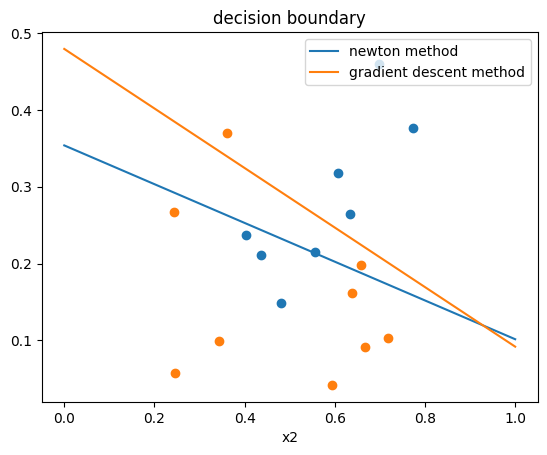

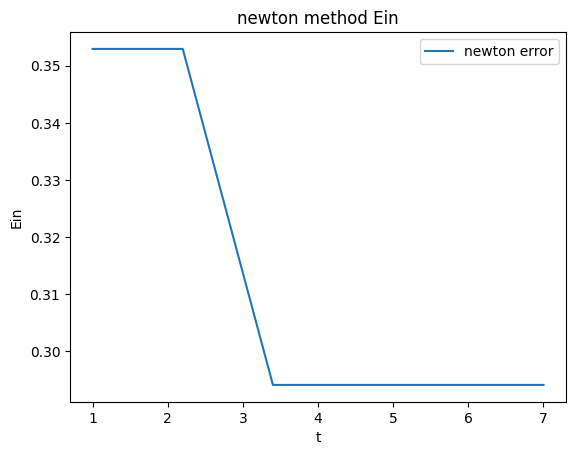

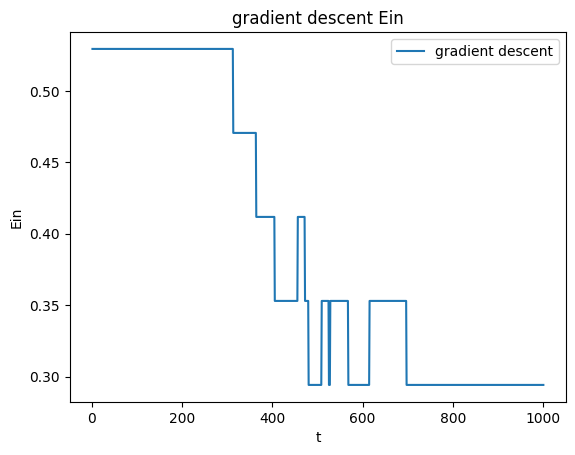

In [46]:
if __name__ == '__main__':
    main()